<a href="https://colab.research.google.com/github/adikulkarni11/Machine-Learning-Models/blob/main/Word_Embeddings_w__IMDB_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Here, we classifiy IMDB reviews into positive and negative reviews.
### We will download the raw IMDB reviews in text format. To convert the words into tensors, we use word embeddings.
### We will first use one of the pre-trained GloVe word embeddings. And then try to improve the embedding.
### To evaluate wether one embedding is better than the other, we use a list of positive words, and a list of negative words. We check how the positive words and negative words are spreaded in an embedding.  Idealy, we want all the positive words to be very close, and all the negative words to be very close in the embedding space, while positive words and negative words be far away from each other. We will define a function to measure how good an embedding is to sperate positive and negative words.
### Using this function, we evaluate the following three embebeddings.
- The glove embedding
- The dense embedding: we use the glove embedding as the initial embbedding and jointly train the embedding and the calssifier using a dense network. We call the resultant embedding the dense embedding.
- The LSTM embedding: we use the glove embedding as the initial embedding and jontly train the embedding and the classifier using a LSTM model. We call the resultant embedding the LSTM embedding.

### From the above three candidates, we choose the best embedding and stack a LSTM layer and a Conv1D layer to build our classifier. We use the dropout to fight overfitting. Our goal is to obtain a classifier that can achieve 90% of accuracy. To achieve this goal, we train the model multiple times by alternatively freezing the embedding layer and other layers.


In [ ]:
#pip install 'tensorflow==2.1.0'


The following command must be run outside of the IPython shell:

    $ pip install 'tensorflow==2.1.0'

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [ ]:
from tensorflow import keras
keras.__version__

'2.2.4-tf'

### First we read a list of positive words from a file. Then we read a list of negative words from another file.

In [ ]:
filepath = 'D:\positive.txt'

L_pos = []
with open(filepath) as fp:
    line = fp.readline()
    cnt = 1
    while line:
        if cnt > 35:
            L_pos.append(line.strip())
        line = fp.readline()
        cnt += 1

for word in L_pos:
    print(word)
print(len(L_pos))

a+
abound
abounds
abundance
abundant
accessable
accessible
acclaim
acclaimed
acclamation
accolade
accolades
accommodative
accomodative
accomplish
accomplished
accomplishment
accomplishments
accurate
accurately
achievable
achievement
achievements
achievible
acumen
adaptable
adaptive
adequate
adjustable
admirable
admirably
admiration
admire
admirer
admiring
admiringly
adorable
adore
adored
adorer
adoring
adoringly
adroit
adroitly
adulate
adulation
adulatory
advanced
advantage
advantageous
advantageously
advantages
adventuresome
adventurous
advocate
advocated
advocates
affability
affable
affably
affectation
affection
affectionate
affinity
affirm
affirmation
affirmative
affluence
affluent
afford
affordable
affordably
afordable
agile
agilely
agility
agreeable
agreeableness
agreeably
all-around
alluring
alluringly
altruistic
altruistically
amaze
amazed
amazement
amazes
amazing
amazingly
ambitious
ambitiously
ameliorate
amenable
amenity
amiability
amiabily
amiable
amicability
amicable
amicabl

winnable
winner
winners
winning
wins
wisdom
wise
wisely
witty
won
wonder
wonderful
wonderfully
wonderous
wonderously
wonders
wondrous
woo
work
workable
worked
works
world-famous
worth
worth-while
worthiness
worthwhile
worthy
wow
wowed
wowing
wows
yay
youthful
zeal
zenith
zest
zippy
2006


In [ ]:
filepath =  'D:\negative.txt'
L_neg = []
with open(filepath) as fp:
    line = fp.readline()
    cnt = 1
    while line:
        if cnt > 35:
            L_neg.append(line.strip())
        line = fp.readline()
        cnt += 1
for word in L_neg:
    print(word)
print(len(L_neg))

2-faced
2-faces
abnormal
abolish
abominable
abominably
abominate
abomination
abort
aborted
aborts
abrade
abrasive
abrupt
abruptly
abscond
absence
absent-minded
absentee
absurd
absurdity
absurdly
absurdness
abuse
abused
abuses
abusive
abysmal
abysmally
abyss
accidental
accost
accursed
accusation
accusations
accuse
accuses
accusing
accusingly
acerbate
acerbic
acerbically
ache
ached
aches
achey
aching
acrid
acridly
acridness
acrimonious
acrimoniously
acrimony
adamant
adamantly
addict
addicted
addicting
addicts
admonish
admonisher
admonishingly
admonishment
admonition
adulterate
adulterated
adulteration
adulterier
adversarial
adversary
adverse
adversity
afflict
affliction
afflictive
affront
afraid
aggravate
aggravating
aggravation
aggression
aggressive
aggressiveness
aggressor
aggrieve
aggrieved
aggrivation
aghast
agonies
agonize
agonizing
agonizingly
agony
aground
ail
ailing
ailment
aimless
alarm
alarmed
alarming
alarmingly
alienate
alienated
alienation
allegation
allegations
allege
aller

insincerely
insincerity
insinuate
insinuating
insinuation
insociable
insolence
insolent
insolently
insolvent
insouciance
instability
instable
instigate
instigator
instigators
insubordinate
insubstantial
insubstantially
insufferable
insufferably
insufficiency
insufficient
insufficiently
insular
insult
insulted
insulting
insultingly
insults
insupportable
insupportably
insurmountable
insurmountably
insurrection
intefere
inteferes
intense
interfere
interference
interferes
intermittent
interrupt
interruption
interruptions
intimidate
intimidating
intimidatingly
intimidation
intolerable
intolerablely
intolerance
intoxicate
intractable
intransigence
intransigent
intrude
intrusion
intrusive
inundate
inundated
invader
invalid
invalidate
invalidity
invasive
invective
inveigle
invidious
invidiously
invidiousness
invisible
involuntarily
involuntary
irascible
irate
irately
ire
irk
irked
irking
irks
irksome
irksomely
irksomeness
irksomenesses
ironic
ironical
ironically
ironies
irony
irragularity
irra

# Using word embeddings

Another popular and powerful way to associate a vector with a word is the use of dense "word vectors", also called "word embeddings". 
While the vectors obtained through one-hot encoding are binary, sparse (mostly made of zeros) and very high-dimensional (same dimensionality as the 
number of words in the vocabulary), "word embeddings" are low-dimensional floating point vectors 
(i.e. "dense" vectors, as opposed to sparse vectors). 
Unlike word vectors obtained via one-hot encoding, word embeddings are learned from data. 
It is common to see word embeddings that are 256-dimensional, 512-dimensional, or 1024-dimensional when dealing with very large vocabularies. 
On the other hand, one-hot encoding words generally leads to vectors that are 20,000-dimensional or higher (capturing a vocabulary of 20,000 
token in this case). So, word embeddings pack more information into far fewer dimensions. 

There are two ways to obtain word embeddings:

* Learn word embeddings jointly with the main task you care about (e.g. document classification or sentiment prediction). 
In this setup, you would start with random word vectors, then learn your word vectors in the same way that you learn the weights of a neural network.
* Load into your model word embeddings that were pre-computed using a different machine learning task than the one you are trying to solve. 
These are called "pre-trained word embeddings". 

Let's take a look at both.

## Learning word embeddings with the `Embedding` layer


The simplest way to associate a dense vector to a word would be to pick the vector at random. The problem with this approach is that the 
resulting embedding space would have no structure: for instance, the words "accurate" and "exact" may end up with completely different 
embeddings, even though they are interchangeable in most sentences. It would be very difficult for a deep neural network to make sense of 
such a noisy, unstructured embedding space. 

To get a bit more abstract: the geometric relationships between word vectors should reflect the semantic relationships between these words. 
Word embeddings are meant to map human language into a geometric space. For instance, in a reasonable embedding space, we would expect 
synonyms to be embedded into similar word vectors, and in general we would expect the geometric distance (e.g. L2 distance) between any two 
word vectors to relate to the semantic distance of the associated words (words meaning very different things would be embedded to points 
far away from each other, while related words would be closer). Even beyond mere distance, we may want specific __directions__ in the 
embedding space to be meaningful. 

[...]


In real-world word embedding spaces, common examples of meaningful geometric transformations are "gender vectors" and "plural vector". For 
instance, by adding a "female vector" to the vector "king", one obtain the vector "queen". By adding a "plural vector", one obtain "kings". 
Word embedding spaces typically feature thousands of such interpretable and potentially useful vectors.

Is there some "ideal" word embedding space that would perfectly map human language and could be used for any natural language processing 
task? Possibly, but in any case, we have yet to compute anything of the sort. Also, there isn't such a thing as "human language", there are 
many different languages and they are not isomorphic, as a language is the reflection of a specific culture and a specific context. But more 
pragmatically, what makes a good word embedding space depends heavily on your task: the perfect word embedding space for an 
English-language movie review sentiment analysis model may look very different from the perfect embedding space for an English-language 
legal document classification model, because the importance of certain semantic relationships varies from task to task.

It is thus reasonable to __learn__ a new embedding space with every new task. Thankfully, backpropagation makes this really easy, and Keras makes it 
even easier. It's just about learning the weights of a layer: the `Embedding` layer.

## Using pre-trained word embeddings


Sometimes, you have so little training data available that could never use your data alone to learn an appropriate task-specific embedding 
of your vocabulary. What to do then?

Instead of learning word embeddings jointly with the problem you want to solve, you could be loading embedding vectors from a pre-computed 
embedding space known to be highly structured and to exhibit useful properties -- that captures generic aspects of language structure. The 
rationale behind using pre-trained word embeddings in natural language processing is very much the same as for using pre-trained convnets 
in image classification: we don't have enough data available to learn truly powerful features on our own, but we expect the features that 
we need to be fairly generic, i.e. common visual features or semantic features. In this case it makes sense to reuse features learned on a 
different problem.

Such word embeddings are generally computed using word occurrence statistics (observations about what words co-occur in sentences or 
documents), using a variety of techniques, some involving neural networks, others not. The idea of a dense, low-dimensional embedding space 
for words, computed in an unsupervised way, was initially explored by Bengio et al. in the early 2000s, but it only started really taking 
off in research and industry applications after the release of one of the most famous and successful word embedding scheme: the Word2Vec 
algorithm, developed by Mikolov at Google in 2013. Word2Vec dimensions capture specific semantic properties, e.g. gender.

There are various pre-computed databases of word embeddings that can download and start using in a Keras `Embedding` layer. Word2Vec is one 
of them. Another popular one is called "GloVe", developed by Stanford researchers in 2014. It stands for "Global Vectors for Word 
Representation", and it is an embedding technique based on factorizing a matrix of word co-occurrence statistics. Its developers have made 
available pre-computed embeddings for millions of English tokens, obtained from Wikipedia data or from Common Crawl data.

Let's take a look at how you can get started using GloVe embeddings in a Keras model. The same method will of course be valid for Word2Vec 
embeddings or any other word embedding database that you can download. We will also use this example to refresh the text tokenization 
techniques we introduced a few paragraphs ago: we will start from raw text, and work our way up.

## Putting it all together: from raw text to word embeddings


We will be using a model similar to the one we just went over -- embedding sentences in sequences of vectors, flattening them and training a 
`Dense` layer on top. But we will do it using pre-trained word embeddings, and instead of using the pre-tokenized IMDB data packaged in 
Keras, we will start from scratch, by downloading the original text data.

### Download the IMDB data as raw text


First, head to `http://ai.stanford.edu/~amaas/data/sentiment/` and download the raw IMDB dataset (if the URL isn't working anymore, just 
Google "IMDB dataset"). Uncompress it.

Now let's collect the individual training reviews into a list of strings, one string per review, and let's also collect the review labels 
(positive / negative) into a `labels` list:

In [ ]:
#!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
#import urllib.request
#url = 'http://ai.stanford.edu/~amaas/data/sentiment/'
#filename = 'aclImdb_v1.tar.gz'
#urllib.request.urlretrieve(url, filename)


In [ ]:
#!tar -xzf aclImdb_v1.tar.gz

In [ ]:
import os

imdb_dir = r'D:\aclImdb_v1\aclImdb'
train_dir = os.path.join(imdb_dir, 'train')


In [ ]:
labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname),encoding="utf8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [ ]:
texts[:2]

["Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly.",
 "Airport '77 starts as a brand new luxury 747 plane is loaded up with valuable paintings & such belonging to rich businessman Philip Stevens (James Stewart) who is flying them & a bunch of VIP's to his estate in preparation of it being opened to the public as a museum, also on board is Stevens daughter Julie (Kathleen Quinlan) & her son.

In [ ]:
labels[:2]

[0, 0]

In [ ]:
len(labels)

25000

### Tokenize the data


Let's vectorize the texts we collected, and prepare a training and validation split.
We will merely be using the concepts we introduced earlier in this section.

Because pre-trained word embeddings are meant to be particularly useful on problems where little training data is available (otherwise, 
task-specific embeddings are likely to outperform them), we will add the following twist: we restrict the training data to its first 200 
samples. So we will be learning to classify movie reviews after looking at just 200 examples...


In [ ]:
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 500  # We will cut reviews after 500 words
training_samples = 20000  # We will be training on 200 samples
validation_samples = 5000  # We will be validating on 10000 samples
max_words = 10000  # We will only consider the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where sample are ordered (all negative first, then all positive).
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 500)
Shape of label tensor: (25000,)


In [ ]:
word_index

{'the': 1,
 'and': 2,
 'a': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'br': 7,
 'in': 8,
 'it': 9,
 'i': 10,
 'this': 11,
 'that': 12,
 'was': 13,
 'as': 14,
 'for': 15,
 'with': 16,
 'movie': 17,
 'but': 18,
 'film': 19,
 'on': 20,
 'not': 21,
 'you': 22,
 'are': 23,
 'his': 24,
 'have': 25,
 'he': 26,
 'be': 27,
 'one': 28,
 'all': 29,
 'at': 30,
 'by': 31,
 'an': 32,
 'they': 33,
 'who': 34,
 'so': 35,
 'from': 36,
 'like': 37,
 'her': 38,
 'or': 39,
 'just': 40,
 'about': 41,
 "it's": 42,
 'out': 43,
 'has': 44,
 'if': 45,
 'some': 46,
 'there': 47,
 'what': 48,
 'good': 49,
 'more': 50,
 'when': 51,
 'very': 52,
 'up': 53,
 'no': 54,
 'time': 55,
 'she': 56,
 'even': 57,
 'my': 58,
 'would': 59,
 'which': 60,
 'only': 61,
 'story': 62,
 'really': 63,
 'see': 64,
 'their': 65,
 'had': 66,
 'can': 67,
 'were': 68,
 'me': 69,
 'well': 70,
 'than': 71,
 'we': 72,
 'much': 73,
 'been': 74,
 'bad': 75,
 'get': 76,
 'will': 77,
 'do': 78,
 'also': 79,
 'into': 80,
 'people': 81,
 'other': 82,
 '

In [ ]:
data.shape

(25000, 500)

### Download the GloVe word embeddings


Head to `https://nlp.stanford.edu/projects/glove/` (where you can learn more about the GloVe algorithm), and download the pre-computed 
embeddings from 2014 English Wikipedia. It's a 822MB zip file named `glove.6B.zip`, containing 100-dimensional embedding vectors for 
400,000 words (or non-word tokens). Un-zip it.

### Pre-process the embeddings


Let's parse the un-zipped file (it's a `txt` file) to build an index mapping words (as strings) to their vector representation (as number 
vectors).

In [ ]:
#!wget http://nlp.stanford.edu/data/glove.6B.zip

In [ ]:
#!unzip glove.6B.zip

In [ ]:
glove_dir = r'D:\glove.6B'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.



Now let's build an embedding matrix that we will be able to load into an `Embedding` layer. It must be a matrix of shape `(max_words, 
embedding_dim)`, where each entry `i` contains the `embedding_dim`-dimensional vector for the word of index `i` in our reference word index 
(built during tokenization). Note that the index `0` is not supposed to stand for any word or token -- it's a placeholder.

In [ ]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

Obtain L_POS:
* the list of postive words, where each word is in the embedding, word_index and whose word index is no more than max_word.

Obtain L_NEG: 
* the list of negative words, where each word is in the embedding, word_index and whose word index is no more than max_word.

In [ ]:
L_POS = []
for word in L_pos:
    if word in embeddings_index and word in word_index and word_index[word] <= max_words:        
        L_POS.append(word)
L_NEG = []
for word in L_neg:
    if word in embeddings_index and word in word_index and word_index[word] <= max_words:        
        L_NEG.append(word)
len(L_POS), len(L_NEG)

(706, 1164)

Print the top 100 most frequently used positive words from L_POS.

In [ ]:
# fill in your code here
# fill in your code here
P = []

d = word_index

for key in d.keys() :
  if len(P) < 100:
    if key in L_POS:
      P.append(key)
  else:
    break

print(P)

['like', 'good', 'well', 'great', 'best', 'love', 'better', 'work', 'pretty', 'enough', 'right', 'interesting', 'fun', 'worth', 'beautiful', 'excellent', 'nice', 'top', 'classic', 'enjoy', 'recommend', 'wonderful', 'perfect', 'liked', 'entertaining', 'loved', 'fans', 'fine', 'amazing', 'humor', 'lead', 'works', 'enjoyed', 'favorite', 'brilliant', 'decent', 'strong', 'wonder', 'hero', 'hilarious', 'cool', 'happy', 'important', 'talent', 'modern', 'clearly', 'supporting', 'fast', 'romantic', 'enjoyable', 'easy', 'fantastic', 'clear', 'famous', 'realistic', 'leads', 'greatest', 'believable', 'free', 'hot', 'superb', 'memorable', 'beauty', 'perfectly', 'worked', 'incredibly', 'leading', 'powerful', 'masterpiece', 'fairly', 'talented', 'success', 'rich', 'cute', 'sweet', 'incredible', 'pure', 'popular', 'convincing', 'intelligent', 'clever', 'successful', 'positive', 'exciting', 'effective', 'amusing', 'appreciate', 'solid', 'impressive', 'respect', 'super', 'win', 'recommended', 'awesome',

Print the top 100 most frequently used negative words from L_NEG.

In [ ]:
# fill in your code here
N = []
for x in word_index.keys():
  if len(N) == 100:
    break
  if x in L_NEG:
    N.append(x)

print(N)

['bad', 'plot', 'funny', 'worst', 'hard', 'poor', 'death', 'dead', 'wrong', 'boring', 'awful', 'stupid', 'terrible', 'lost', 'worse', 'waste', 'problem', 'evil', 'killer', 'dark', 'unfortunately', 'kill', 'horrible', 'slow', 'killed', 'lack', 'murder', 'crap', 'hell', 'annoying', 'sad', 'scary', 'ridiculous', 'strange', 'disappointed', 'cheap', 'silly', 'problems', 'miss', 'falls', 'mystery', 'dull', 'die', 'hate', 'sorry', 'fall', 'weak', 'crime', 'doubt', 'lame', 'poorly', 'zombie', 'difficult', 'killing', 'shame', 'badly', 'weird', 'crazy', 'mess', 'creepy', 'cheesy', 'monster', 'joke', 'break', 'dumb', 'fails', 'twist', 'odd', 'sadly', 'cold', 'missed', 'wasted', 'revenge', 'tension', 'fear', 'bored', 'kills', 'violent', 'trouble', 'died', 'pointless', 'trash', 'bizarre', 'impossible', 'mad', 'prison', 'disturbing', 'sick', 'failed', 'fake', 'fiction', 'pathetic', 'garbage', 'utterly', 'attack', 'loud', 'unbelievable', 'twists', 'complex', 'mistake']


### Define a model

We will be using the same model architecture as before:

### Load the GloVe embeddings in the model


The `Embedding` layer has a single weight matrix: a 2D float matrix where each entry `i` is the word vector meant to be associated with 
index `i`. Simple enough. Let's just load the GloVe matrix we prepared into our `Embedding` layer, the first layer in our model:

### Train and evaluate

Let's compile our model and train it:

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 2s 115us/sample - loss: 0.6571 - acc: 0.6384 - val_loss: 0.5783 - val_acc: 0.6948
Epoch 2/10
20000/20000 [==============================] - 2s 91us/sample - loss: 0.4625 - acc: 0.7823 - val_loss: 0.5423 - val_acc: 0.7358
Epoch 3/10
20000/20000 [==============================] - 2s 91us/sample - loss: 0.3516 - acc: 0.8457 - val_loss: 0.5918 - val_acc: 0.7240
Epoch 4/10
20000/20000 [==============================] - 2s 93us/sample - loss: 0.2751 - acc: 0.8820 - val_loss: 0.6425 - val_acc: 0.7314
Epoch 5/10
20000/20000 [==============================] - 2s 90us/sample - loss: 0.2170 - acc: 0.9100 - val_loss: 0.8190 - val_acc: 0.7114
Epoch 6/10
20000/20000 [==============================] - 2s 90us/sample - loss: 0.1625 - acc: 0.9355 - val_loss: 0.8554 - val_acc: 0.7174
Epoch 7/10
20000/20000 [==============================] - 2s 90us/sample - loss: 0.1219 - acc: 0.9531 - val_loss: 1.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

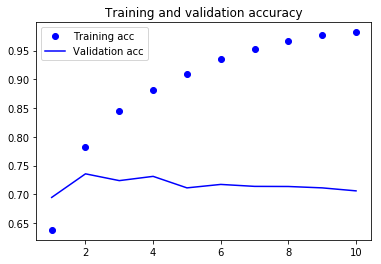

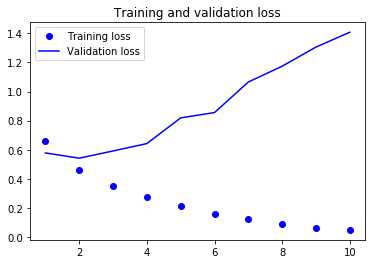

In [ ]:
plot_history(history)

Now train the embedding and the dense layers jointly.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 5s 267us/sample - loss: 0.6635 - acc: 0.6856 - val_loss: 0.4135 - val_acc: 0.8226
Epoch 2/10
20000/20000 [==============================] - 5s 253us/sample - loss: 0.2970 - acc: 0.8741 - val_loss: 0.3915 - val_acc: 0.8312
Epoch 3/10
20000/20000 [==============================] - 5s 253us/sample - loss: 0.1573 - acc: 0.9381 - val_loss: 0.4095 - val_acc: 0.8480
Epoch 4/10
20000/20000 [==============================] - 5s 254us/sample - loss: 0.0722 - acc: 0.9748 - val_loss: 0.5257 - val_acc: 0.8458
Epoch 5/10
20000/20000 [==============================] - 5s 253us/sample - loss: 0.0297 - acc: 0.9905 - val_loss: 0.6565 - val_acc: 0.8436
Epoch 6/10
20000/20000 [==============================] - 5s 253us/sample - loss: 0.0139 - acc: 0.9952 - val_loss: 0.9962 - val_acc: 0.8174
Epoch 7/10
20000/20000 [==============================] - 5s 255us/sample - loss: 0.0059 - acc: 0.9977 - val_lo

Let's plot its performance over time:

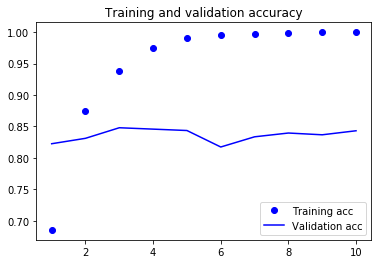

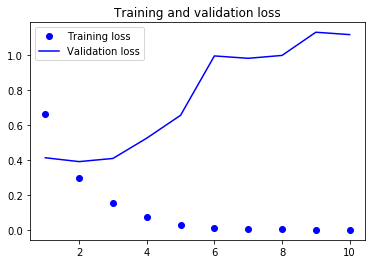

In [ ]:
plot_history(history)

In [ ]:
embedding_matrix1 = model.layers[0].get_weights()[0]

Now we train the embedding and the LSTM layers jointly.

In [ ]:
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 15s 734us/sample - loss: 0.4932 - acc: 0.7570 - val_loss: 0.3418 - val_acc: 0.8576
Epoch 2/10
20000/20000 [==============================] - 13s 644us/sample - loss: 0.2839 - acc: 0.8859 - val_loss: 0.2764 - val_acc: 0.8894
Epoch 3/10
20000/20000 [==============================] - 13s 646us/sample - loss: 0.2136 - acc: 0.9179 - val_loss: 0.2682 - val_acc: 0.8952
Epoch 4/10
20000/20000 [==============================] - 13s 644us/sample - loss: 0.1727 - acc: 0.9372 - val_loss: 0.2557 - val_acc: 0.8992
Epoch 5/10
20000/20000 [==============================] - 13s 641us/sample - loss: 0.1399 - acc: 0.9496 - val_loss: 0.2800 - val_acc: 0.8966
Epoch 6/10
20000/20000 [==============================] - 13s 641us/sample - loss: 0.1163 - acc: 0.9581 - val_loss: 0.3221 - val_acc: 0.8926
Epoch 7/10
20000/20000 [==============================] - 13s 642us/sample - loss: 0.0934 - acc: 0.9686 -

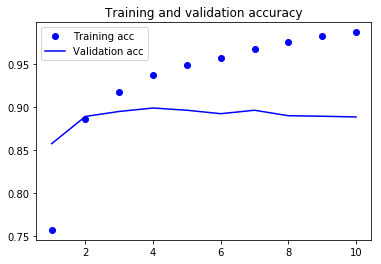

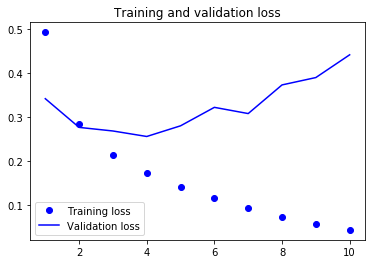

In [ ]:
plot_history(history)

In [ ]:
embedding_matrix2 = model.layers[0].get_weights()[0]

In [ ]:
len(word_index)


88582

In [ ]:
embedding_matrix.shape

(10000, 100)

Implement the following three functions that measure the distance between words in the three different embeddings.

In [ ]:
print(embedding_matrix[word_index['better']])

[-0.047543    0.51914001  0.34283999 -0.09606    -0.4474     -0.3707
 -0.12871    -0.50327998 -0.26129001 -0.090832   -0.060988   -0.36864999
  0.21908    -0.35644999  0.32993001 -0.29609001 -0.018273    0.16066
 -0.35905999  0.67961001  0.13921     0.12728    -0.097452   -0.15845001
 -0.24286    -0.26502001 -0.41235    -1.0086     -0.055266    0.051596
 -0.24647     0.69691998 -0.010224   -0.14127     0.95921999  0.40876001
 -0.54785001  0.3935     -0.090709   -0.22418     0.0491     -0.34819001
 -0.044169   -0.42278001 -0.63472998  0.070979    0.13304999 -0.5402
 -0.013333   -1.6006     -0.39543    -0.17326    -0.23691     1.37520003
  0.20951    -2.47429991  0.48554999  0.20272     1.50259995 -0.11918
 -0.29868001  0.68989998 -0.87974    -0.041267    0.58978999  0.13067
  0.30467001  0.33649999  0.21907    -0.17314     0.22645    -0.18273
  0.15126    -0.44416001  0.66597003  0.03561    -0.36267999 -0.25459999
 -0.062423   -0.13725001  0.53821999  0.22712    -1.06190002  0.16509999


In [ ]:
word_index['the']

1

In [ ]:

def word_dist(word1, word2, embedding_matrix):
    # fill in your code here
    w1_vec= embedding_matrix[word_index[word1]]
    w2_vec = embedding_matrix[word_index[word2]]
    dist = np.linalg.norm(w1_vec - w2_vec)
    return dist


def dist_glove(word1, word2):
    return word_dist(word1, word2, embedding_matrix)

def dist_dense(word1, word2):
    return word_dist(word1, word2, embedding_matrix1)

def dist_LSTM(word1, word2):
    return word_dist(word1, word2, embedding_matrix2)

Observe the following reults and check whether dense embedding and LSTM embedding are better than the glove embedding on these results.

In [ ]:
print(dist_glove('better', 'worse') < dist_glove('worst', 'worse'))
print(dist_dense('better', 'worse') < dist_dense('worst', 'worse'))
print(dist_LSTM('better', 'worse') < dist_LSTM('worst', 'worse'))

True
False
False


In [ ]:
print(dist_glove('good', 'bad') < dist_glove('poor', 'bad'))
print(dist_dense('good', 'bad') < dist_dense('poor', 'bad'))
print(dist_LSTM('good', 'bad') < dist_LSTM('poor', 'bad'))

True
False
True


In [ ]:
print(dist_glove('bad', 'good') < dist_glove('great', 'good'))
print(dist_dense('bad', 'good') < dist_dense('great', 'good'))
print(dist_LSTM('bad', 'good') < dist_LSTM('great', 'good'))

True
False
False


In [ ]:
print(dist_glove('clever', 'clumsy') < dist_glove('clever', 'ingenious'))
print(dist_dense('clever', 'clumsy') < dist_dense('clever', 'ingenious'))
print(dist_LSTM('clever', 'clumsy') < dist_LSTM('clever', 'ingenious'))

True
False
True


Find the nearest neighhor of a word for the three embeddings.

In [ ]:
def NN_general(word, embedding_matrix):
  # fill in your code here
  word_vec = embedding_matrix[word_index[word]]
  counter  = 0
  displacement = 9999999999999
  for neighbour in word_index:
    counter = counter + 1
    # word index dictionary starts at 1 and ends at 10,000, whereas the word embedding matrix starts at 0 and ends at 9,999.
    neighbour_vec= embedding_matrix[word_index[neighbour]]
    #Calculating distance b/w words
    y = np.linalg.norm(word_vec - neighbour_vec)
    #if new distance is smallest and not the same word, replace x
    if y < displacement:
      if word != neighbour:
        displacement  = y
        tmp = neighbour  
    if counter == max_words - 1:
     # print(counter)
      break 
  return tmp

    
def NN_LSTM(word):
    return NN_general(word, embedding_matrix2)

def NN_dense(word):
    return NN_general(word, embedding_matrix1)

def NN_glove(word):
    return NN_general(word, embedding_matrix)

List of all the words that the nearest neighbor changes in the LSTM embedding, while its nearest neighbor does not change in the dense embedding.

In [ ]:
count = 0
for word in L_POS + L_NEG:
    if NN_LSTM(word) != NN_glove(word) and NN_dense(word) == NN_glove(word):
        print('::::', word, NN_LSTM(word), NN_glove(word))
        count += 1
print(count, 'changes', 'out of', len(L_POS) + len(L_NEG))

:::: admirably masterfully excellently
:::: admirer enigmatic admired
:::: appealing appeal compelling
:::: awarded received award
:::: awe inspiring delight
:::: beautifully brilliantly wonderfully
:::: best good well
:::: blessing blessed divine
:::: bloom 90's hardy
:::: champion runner defending
:::: clearly certainly obviously
:::: compassionate humble sober
:::: cool warm hot
:::: coolest strangest scariest
:::: correct fix incorrect
:::: creative innovative artistic
:::: destiny theirs essence
:::: enhances conveys demonstrates
:::: enough needed even
:::: excellently superbly fantastically
:::: fabulous gorgeous marvelous
:::: fair sort kind
:::: fairly reasonably quite
:::: fame talent stardom
:::: futuristic retro whimsical
:::: greatness glory perfection
:::: gusto today's subtlety
:::: happier funnier fortunate
:::: happiness satisfaction longing
:::: happy everyone feel
:::: harmless superfluous useless
:::: helping helped help
:::: inspire remind inspiring
:::: jolly here

List of the words that its nearest neighbor changes in the dense embedding, while the nearest neighbor does not change in the LSTM embedding.

In [ ]:
count = 0
for word in L_POS + L_NEG:
    if NN_dense(word) != NN_glove(word) and NN_LSTM(word) == NN_glove(word):
        print('::::', word, NN_dense(word), NN_glove(word))
        count += 1
print(count, 'changes', 'out of', len(L_POS) + len(L_NEG))

:::: accomplishment accomplished remarkable
:::: afford wanting willing
:::: breathtaking stunning astonishing
:::: compliment he'll liking
:::: confident optimistic satisfied
:::: credible plausible consistent
:::: dazzling gorgeous breathtaking
:::: decent better respectable
:::: dignity conscience respect
:::: distinction regard exception
:::: ease push continuing
:::: efficient innovative effective
:::: excellent superb terrific
:::: exciting surprising interesting
:::: extraordinarily exceptionally incredibly
:::: famous renowned famed
:::: fast faster slow
:::: feat accomplishment accomplished
:::: fond sentimental remembered
:::: free giving allowed
:::: genius artistry cinematic
:::: hallmark keaton's it's
:::: hilarious captivating amusing
:::: honesty modesty clarity
:::: humble wise cheerful
:::: humorous lighthearted amusing
:::: impress distract convince
:::: impressed surprised delighted
:::: instantly simultaneously suddenly
:::: integrated developed dynamic
:::: interes

In [ ]:
count = 0
for word in L_POS + L_NEG:
    if NN_LSTM(word) != NN_dense(word) and NN_dense(word) != NN_glove(word) and NN_LSTM(word) != NN_glove(word):
        print('::::', word, NN_glove(word), NN_dense(word), NN_LSTM(word))
        count += 1
print(count)

:::: advanced advance improved advances
:::: advantage chance opportunity gain
:::: authentic imitation genuine essence
:::: avid admirer passionate he's
:::: beauty obsession essence gorgeous
:::: believable contrived captivating likable
:::: beloved loved grandmother legendary
:::: better good even need
:::: bliss it's stewart's 90's
:::: bravo hooper zane lara
:::: charm charisma charms wit
:::: clever clumsy ingenious imaginative
:::: comfortable staying easy enjoying
:::: consistent inconsistent contrary manner
:::: continuity relevance breakdown correctness
:::: contribution benefit achievement exceptional
:::: conveniently incidentally evidently curiously
:::: convincingly masterfully interestingly realistically
:::: cure treat treating miracle
:::: darling peters kid's would've
:::: dashing it's killer's don't
:::: delight joy awe longing
:::: eager hoping anxious reluctant
:::: effortlessly clumsily subtly masterfully
:::: elevate emphasize it'll i'd
:::: excels it's devil's t

Get the list of words that dense embedding and LSTM embedding agree on the nearest neighbor but do not agree with the glove embedding.

In [ ]:
count = 0
for word in L_POS + L_NEG:
    if NN_LSTM(word) == NN_dense(word) and NN_dense(word) != NN_glove(word):
        #print('yes')
        print('::::', word, NN_glove(word), NN_dense(word), NN_LSTM(word))
        count += 1
    #else:
        #print('no')
print(count)

:::: accomplished importantly accomplishment accomplishment
:::: ambitious promising innovative innovative
:::: amusing hilarious comical comical
:::: appropriate proper necessary necessary
:::: bargain deals buying buying
:::: breakthrough success progress progress
:::: bright dark gray gray
:::: cheer delight cry cry
:::: cheerful dreamy playful playful
:::: clean enough ensure ensure
:::: compassion empathy kindness kindness
:::: correctly accurately guessed guessed
:::: courage honesty determination determination
:::: crisp delicious cool cool
:::: divine god mystical mystical
:::: educated younger gifted gifted
:::: enhance improve promote promote
:::: entertains betrays informs informs
:::: fans crowd fan fan
:::: fun stuff entertaining entertaining
:::: heavenly heaven divine divine
:::: honorable worthy deserving deserving
:::: hug kiss goodbye goodbye
:::: improve enhance improved improved
:::: inspirational inspiring uplifting uplifting
:::: intricate elaborate exquisite exqu

Get the list of words that glove, dense, LSTM embeddings all agree on the nearest neighbor.

In [ ]:
count = 0
for word in L_POS + L_NEG:
    if NN_LSTM(word) == NN_dense(word) and NN_dense(word) == NN_glove(word):
        print('::::', word, NN_glove(word), NN_dense(word), NN_LSTM(word))
        count += 1
print(count)

:::: abound notwithstanding notwithstanding notwithstanding
:::: abundance hence hence hence
:::: accessible convenient convenient convenient
:::: acclaim garnered garnered garnered
:::: acclaimed renowned renowned renowned
:::: accomplish realize realize realize
:::: accurate precise precise precise
:::: accurately correctly correctly correctly
:::: achievement achievements achievements achievements
:::: achievements achievement achievement achievement
:::: adequate sufficient sufficient sufficient
:::: admirable commendable commendable commendable
:::: admiration affection affection affection
:::: admire appreciate appreciate appreciate
:::: adorable cute cute cute
:::: adore despise despise despise
:::: adventurous imaginative imaginative imaginative
:::: affection admiration admiration admiration
:::: amazed thrilled thrilled thrilled
:::: amazing incredible incredible incredible
:::: amazingly astonishingly astonishingly astonishingly
:::: ample sufficient sufficient sufficient
::

:::: improved improve improve improve
:::: improvement improved improved improved
:::: incredible amazing amazing amazing
:::: incredibly extraordinarily extraordinarily extraordinarily
:::: influential prominent prominent prominent
:::: ingenious inventive inventive inventive
:::: innovative creative creative creative
:::: insightful informative informative informative
:::: inspiration inspired inspired inspired
:::: inspiring captivating captivating captivating
:::: intelligence cia cia cia
:::: intelligent smart smart smart
:::: interests regard regard regard
:::: intriguing interesting interesting interesting
:::: inventive imaginative imaginative imaginative
:::: irresistible seductive seductive seductive
:::: keen eager eager eager
:::: kindness compassion compassion compassion
:::: lavish gifts gifts gifts
:::: lead leads leads leads
:::: leading led led led
:::: leads lead lead lead
:::: led leading leading leading
:::: legendary famed famed famed
:::: lighter thinner thinner t

:::: absurdity silliness silliness silliness
:::: addict addicted addicted addicted
:::: addicted addict addict addict
:::: afraid scared scared scared
:::: agony anguish anguish anguish
:::: alarm warning warning warning
:::: alienation loneliness loneliness loneliness
:::: ambiguity absurdity absurdity absurdity
:::: anger frustration frustration frustration
:::: angry furious furious furious
:::: anguish grief grief grief
:::: annoyance seeming seeming seeming
:::: annoyed irritated irritated irritated
:::: annoying irritating irritating irritating
:::: annoyingly amusingly amusingly amusingly
:::: anxious eager eager eager
:::: apocalypse zombie zombie zombie
:::: apocalyptic nightmarish nightmarish nightmarish
:::: appalled horrified horrified horrified
:::: ashamed embarrassed embarrassed embarrassed
:::: assault attack attack attack
:::: atrocities brutality brutality brutality
:::: attack attacks attacks attacks
:::: attacks attack attack attack
:::: avenge revenge revenge reve

:::: enemy enemies enemies enemies
:::: error errors errors errors
:::: evil enemies enemies enemies
:::: exaggeration understatement understatement understatement
:::: excruciating numbing numbing numbing
:::: excruciatingly painfully painfully painfully
:::: excuses excuse excuse excuse
:::: exhausted weary weary weary
:::: explode exploding exploding exploding
:::: exploit exploited exploited exploited
:::: explosive bombs bombs bombs
:::: failed attempt attempt attempt
:::: failing failed failed failed
:::: fails fail fail fail
:::: failures shortcomings shortcomings shortcomings
:::: faint ominous ominous ominous
:::: fake phony phony phony
:::: fallen falling falling falling
:::: falling rising rising rising
:::: falls rises rises rises
:::: fanatic fanatics fanatics fanatics
:::: fanatics fanatic fanatic fanatic
:::: farce melodrama melodrama melodrama
:::: fascist neo neo neo
:::: fault faults faults faults
:::: faults fault fault fault
:::: fear worry worry worry
:::: fears co

:::: pains pain pain pain
:::: pale dark dark dark
:::: pan cook cook cook
:::: panic fear fear fear
:::: paranoia cynicism cynicism cynicism
:::: parody spoof spoof spoof
:::: passive static static static
:::: pathetic pitiful pitiful pitiful
:::: peculiar unusual unusual unusual
:::: perverted amoral amoral amoral
:::: petty crooks crooks crooks
:::: phony bogus bogus bogus
:::: pig pigs pigs pigs
:::: pigs pig pig pig
:::: pitiful pathetic pathetic pathetic
:::: pity shame shame shame
:::: plague scare scare scare
:::: plight misery misery misery
:::: plot plots plots plots
:::: prejudice prejudices prejudices prejudices
:::: prejudices stereotypes stereotypes stereotypes
:::: preposterous ludicrous ludicrous ludicrous
:::: pretend pretending pretending pretending
:::: prison jail jail jail
:::: prisoner prisoners prisoners prisoners
:::: problem problems problems problems
:::: problems problem problem problem
:::: profanity nudity nudity nudity
:::: protest calling calling calling


:::: utterly totally totally totally
:::: vague ambiguous ambiguous ambiguous
:::: vain hurry hurry hurry
:::: vanity esquire esquire esquire
:::: vengeance revenge revenge revenge
:::: vengeful conniving conniving conniving
:::: vice president president president
:::: vicious murderous murderous murderous
:::: violently brutally brutally brutally
:::: virus infected infected infected
:::: vulnerable particularly particularly particularly
:::: warning alert alert alert
:::: wasted saved saved saved
:::: wasting wasted wasted wasted
:::: weak weaker weaker weaker
:::: whiny dopey dopey dopey
:::: whore slut slut slut
:::: wicked mischievous mischievous mischievous
:::: wild animals animals animals
:::: wildly predictably predictably predictably
:::: woefully hopelessly hopelessly hopelessly
:::: worn wore wore wore
:::: worried worry worry worry
:::: worry worried worried worried
:::: worrying worry worry worry
:::: worse bad bad bad
:::: worthless useless useless useless
:::: wound che

## Visualization of the three embeddings. We want to see how the positive words and negative words are spreaded in two dimensional space.

In [ ]:
emb_glove = []
emb_dense = []
emb_LSTM = []
for word in L_POS + L_NEG:
    emb = embedding_matrix[word_index[word]]
    emb_glove.append(emb)
    emb = embedding_matrix1[word_index[word]]
    emb_dense.append(emb)
    emb = embedding_matrix2[word_index[word]]
    emb_LSTM.append(emb)

In [ ]:
emb_glove = np.array(emb_glove)
emb_dense = np.array(emb_dense)
emb_LSTM = np.array(emb_LSTM)

In [ ]:
emb_glove.shape, emb_dense.shape, emb_LSTM.shape

((1870, 100), (1870, 100), (1870, 100))

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
X_LSTM = TSNE(n_components=2).fit_transform(emb_LSTM)

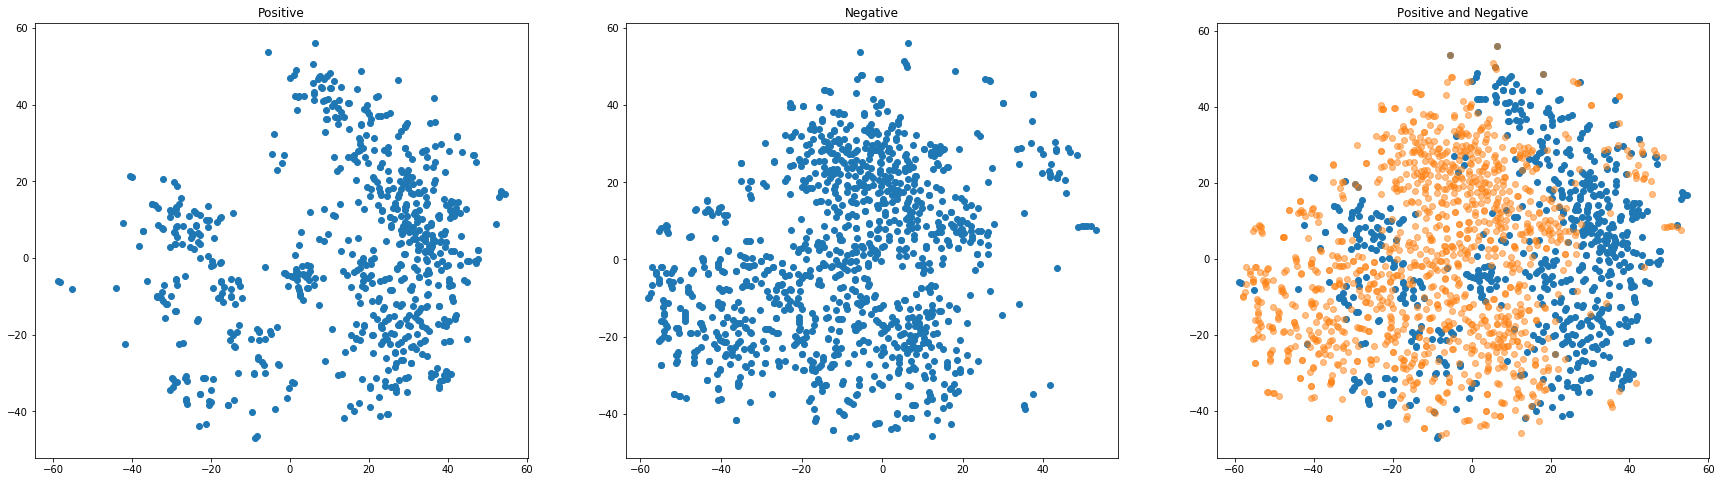

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,8))
plt.subplot(131)
plt.scatter(X_LSTM[:len(L_POS),0], X_LSTM[:len(L_POS),1])
plt.title("Positive")
plt.subplot(132)
plt.scatter(X_LSTM[len(L_POS):,0], X_LSTM[len(L_POS):,1])
plt.title("Negative")
plt.subplot(133)
plt.scatter(X_LSTM[:len(L_POS),0], X_LSTM[:len(L_POS),1])
plt.scatter(X_LSTM[len(L_POS):,0], X_LSTM[len(L_POS):,1], alpha=0.5)
plt.title("Positive and Negative")
plt.show()

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
X_dense = TSNE(n_components=2).fit_transform(emb_dense)

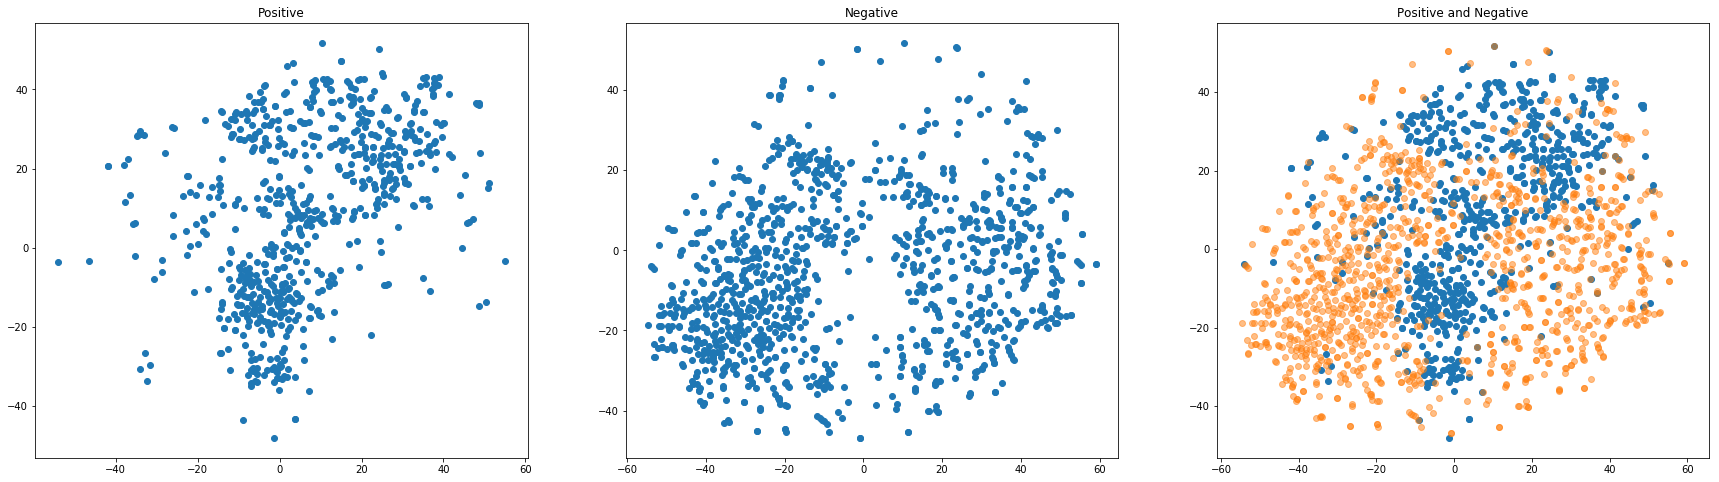

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,8))
plt.subplot(131)
plt.scatter(X_dense[:len(L_POS),0], X_dense[:len(L_POS),1])
plt.title("Positive")
plt.subplot(132)
plt.scatter(X_dense[len(L_POS):,0], X_dense[len(L_POS):,1])
plt.title("Negative")
plt.subplot(133)
plt.scatter(X_dense[:len(L_POS),0], X_dense[:len(L_POS),1])
plt.scatter(X_dense[len(L_POS):,0], X_dense[len(L_POS):,1], alpha=0.5)
plt.title("Positive and Negative")
plt.show()

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
X_glove = TSNE(n_components=2).fit_transform(emb_glove)

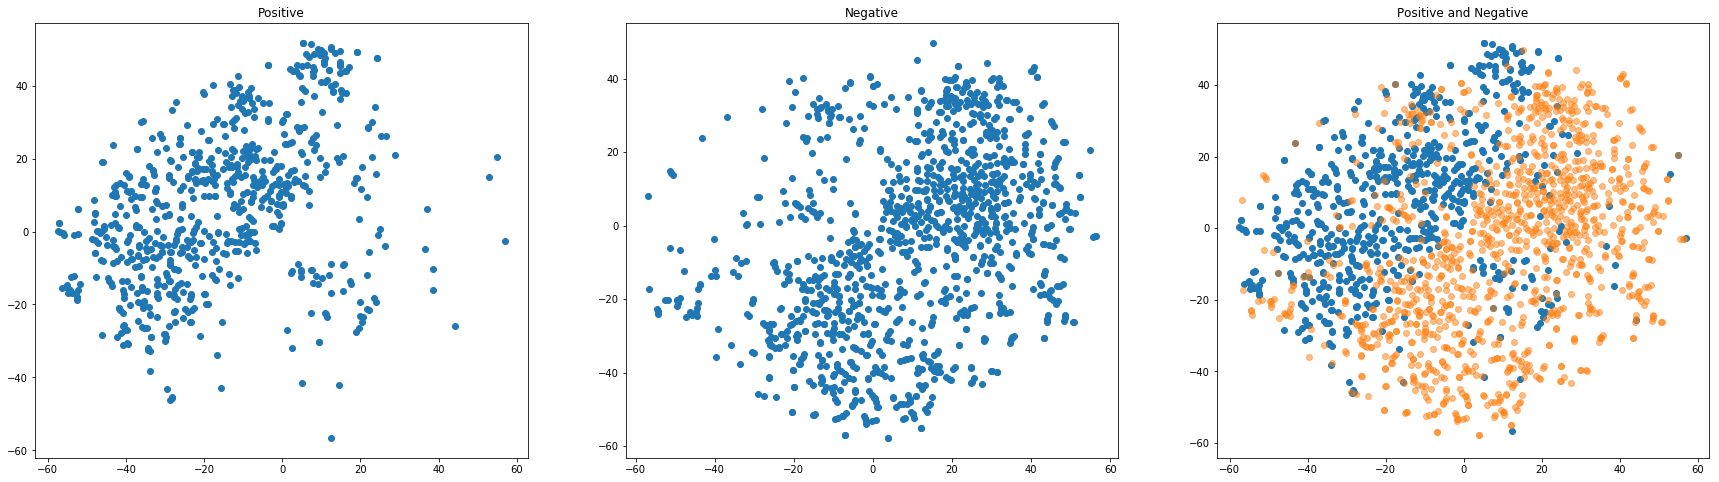

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,8))
plt.subplot(131)
plt.scatter(X_glove[:len(L_POS),0], X_glove[:len(L_POS),1])
plt.title("Positive")
plt.subplot(132)
plt.scatter(X_glove[len(L_POS):,0], X_glove[len(L_POS):,1])
plt.title("Negative")
plt.subplot(133)
plt.scatter(X_glove[:len(L_POS),0], X_glove[:len(L_POS),1])
plt.scatter(X_glove[len(L_POS):,0], X_glove[len(L_POS):,1], alpha=0.5)
plt.title("Positive and Negative")
plt.show()

Next we implement the class distance function for the three embeddings.

In [ ]:
L_NEG[1162]

'yawn'

In [ ]:
def class_dist(L_POS, L_NEG, embedding_matrix):
    # fill in your code here
    # We first calcuate the average distance between a word in L_POS and a word in L_NEG. We call this d12
    # We then calcuate the average distance between two words in L_POS + L_NEG. We call this d
    # We return d12/d as the result
    
    pairs = 0
    sum_pos_neg = 0
    for pos_word in L_POS:
      for neg_word in L_NEG:
        if pos_word != neg_word:
          #print(pos_word, neg_word)
          pairs += 1
          pos_vec = embedding_matrix[word_index[pos_word]]
          neg_vec = embedding_matrix[word_index[neg_word]]
          displacement = np.linalg.norm(pos_vec - neg_vec)
          sum_pos_neg += displacement
    d12 = sum_pos_neg / pairs
    sum_words = 0
    count = 0
    for word1 in (L_POS + L_NEG):
      for word2 in (L_POS + L_NEG):
        if word1 != word2:
          count += 1
          word1_vec = embedding_matrix[word_index[word1]]
          word2_vec = embedding_matrix[word_index[word2]]
          distance = np.linalg.norm(word1_vec - word2_vec)
          sum_words += distance
    d = sum_words / count
    res = d12/d
    return res

def class_dist_glove():
    return class_dist(L_POS, L_NEG, embedding_matrix)

def class_dist_dense():
    return class_dist(L_POS, L_NEG, embedding_matrix1)

def class_dist_LSTM():
    return class_dist(L_POS, L_NEG, embedding_matrix2)

d_glove = class_dist_glove()
d_dense = class_dist_dense()
d_LSTM = class_dist_LSTM()

In [ ]:
print(d_glove, d_dense, d_LSTM)
print("Relative improvments:")
print("Dense:", (d_dense-d_glove)/d_glove*100)
print("LSTM:", (d_LSTM-d_glove)/d_glove*100)

1.016228123977183 1.0238974717077367 1.0183416096572087
Relative improvments:
Dense: 0.7546876089729049
LSTM: 0.20797354748991526


Now we double check the chosen embedding is indeeded better. We use the chosen embedding and LSTM model and check whether the valdidation accuracy is better.

In [ ]:
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix1])
model.layers[0].trainable = False
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 10s 520us/sample - loss: 0.3550 - acc: 0.8526 - val_loss: 0.2945 - val_acc: 0.8804
Epoch 2/10
20000/20000 [==============================] - 9s 472us/sample - loss: 0.2610 - acc: 0.8989 - val_loss: 0.2859 - val_acc: 0.8814
Epoch 3/10
20000/20000 [==============================] - 10s 481us/sample - loss: 0.2316 - acc: 0.9111 - val_loss: 0.2720 - val_acc: 0.8936
Epoch 4/10
20000/20000 [==============================] - 9s 468us/sample - loss: 0.2138 - acc: 0.9175 - val_loss: 0.2695 - val_acc: 0.8970
Epoch 5/10
20000/20000 [==============================] - 9s 467us/sample - loss: 0.2023 - acc: 0.9215 - val_loss: 0.2684 - val_acc: 0.8942
Epoch 6/10
20000/20000 [==============================] - 9s 471us/sample - loss: 0.1915 - acc: 0.9269 - val_loss: 0.2613 - val_acc: 0.8920
Epoch 7/10
20000/20000 [==============================] - 9s 468us/sample - loss: 0.1840 - acc: 0.9302 - val_

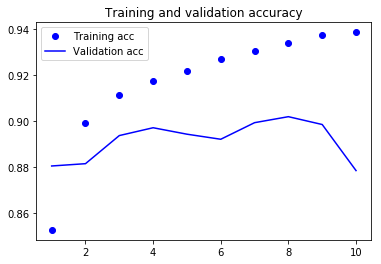

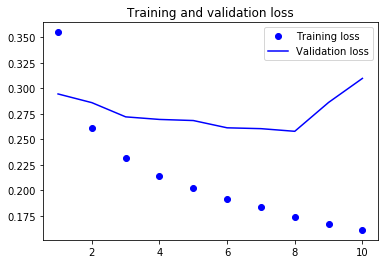

In [ ]:
plot_history(history)

In [ ]:
from tensorflow.keras import backend as K 

K.clear_session()

In [ ]:
from tensorflow.keras import layers


model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(layers.Bidirectional(LSTM(32, return_sequences = True)))
model.add(layers.Conv1D(64, 7, activation='relu'))
model.add(layers.GlobalMaxPool1D())
model.add(Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix1])
model.layers[0].trainable = False
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 100)          1000000   
_________________________________________________________________
bidirectional (Bidirectional (None, 500, 64)           34048     
_________________________________________________________________
conv1d (Conv1D)              (None, 494, 64)           28736     
_________________________________________________________________
global_max_pooling1d (Global (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 256)               16640     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2

In [ ]:
# This is an important technique one needs to learn
callbacks_list = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,),
    keras.callbacks.ModelCheckpoint(filepath='LSTM_Conv1D.h5', monitor='val_acc', save_best_only=True,)]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train, shuffle=True,
                    epochs=200,
                    batch_size=64,
                    callbacks=callbacks_list,
                    validation_data=(x_val, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/200
20000/20000 [==============================] - 12s 581us/sample - loss: 0.2891 - acc: 0.8757 - val_loss: 0.2742 - val_acc: 0.8892
Epoch 2/200
20000/20000 [==============================] - 10s 499us/sample - loss: 0.2250 - acc: 0.9099 - val_loss: 0.2479 - val_acc: 0.8988
Epoch 3/200
20000/20000 [==============================] - 10s 500us/sample - loss: 0.2006 - acc: 0.9208 - val_loss: 0.2457 - val_acc: 0.9002
Epoch 4/200
20000/20000 [==============================] - 10s 498us/sample - loss: 0.1856 - acc: 0.9265 - val_loss: 0.2602 - val_acc: 0.8966
Epoch 5/200
20000/20000 [==============================] - 10s 498us/sample - loss: 0.1734 - acc: 0.9319 - val_loss: 0.2938 - val_acc: 0.8818
Epoch 6/200
20000/20000 [==============================] - 10s 503us/sample - loss: 0.1553 - acc: 0.9391 - val_loss: 0.2648 - val_acc: 0.8974
Epoch 7/200
20000/20000 [==============================] - 10s 504us/sample - loss: 0.1417 - acc: 0

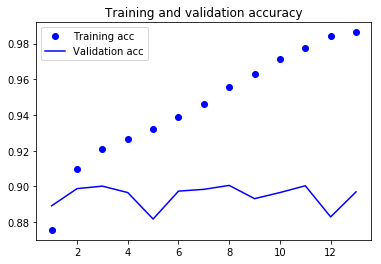

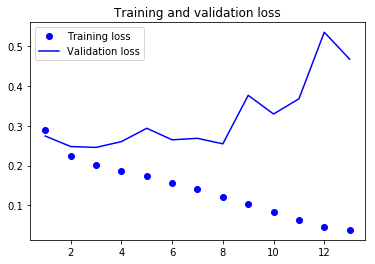

In [ ]:
plot_history(history)

In [ ]:
model = keras.models.load_model('LSTM_Conv1D.h5')
model.layers[0].trainable = True
for i in range(1, len(model.layers)):
    model.layers[i].trainable = False

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 100)          1000000   
_________________________________________________________________
bidirectional (Bidirectional (None, 500, 64)           34048     
_________________________________________________________________
conv1d (Conv1D)              (None, 494, 64)           28736     
_________________________________________________________________
global_max_pooling1d (Global (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 256)               16640     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2

In [ ]:
# This is an important technique one needs to learn
callbacks_list = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,),
    keras.callbacks.ModelCheckpoint(filepath='LSTM_Conv1D_retrain.h5', monitor='val_acc', save_best_only=True,)]


history = model.fit(x_train, y_train, shuffle=True,
                    epochs=200,
                    batch_size=64,
                    callbacks=callbacks_list,
                    validation_data=(x_val, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/200
20000/20000 [==============================] - 164s 8ms/sample - loss: 0.0881 - acc: 0.9734 - val_loss: 0.2489 - val_acc: 0.9056
Epoch 2/200
20000/20000 [==============================] - 163s 8ms/sample - loss: 0.0557 - acc: 0.9876 - val_loss: 0.2528 - val_acc: 0.9064
Epoch 3/200
20000/20000 [==============================] - 163s 8ms/sample - loss: 0.0383 - acc: 0.9936 - val_loss: 0.2563 - val_acc: 0.9050
Epoch 4/200
20000/20000 [==============================] - 162s 8ms/sample - loss: 0.0283 - acc: 0.9966 - val_loss: 0.2611 - val_acc: 0.9078
Epoch 5/200
20000/20000 [==============================] - 162s 8ms/sample - loss: 0.0214 - acc: 0.9984 - val_loss: 0.2661 - val_acc: 0.9086
Epoch 6/200
20000/20000 [==============================] - 162s 8ms/sample - loss: 0.0162 - acc: 0.9991 - val_loss: 0.2715 - val_acc: 0.9086
Epoch 7/200
20000/20000 [==============================] - 161s 8ms/sample - loss: 0.0131 - acc: 0.9994 -

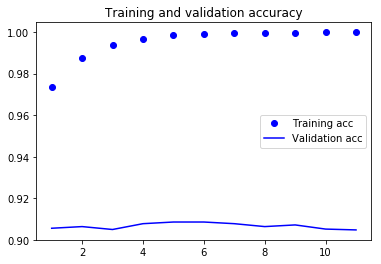

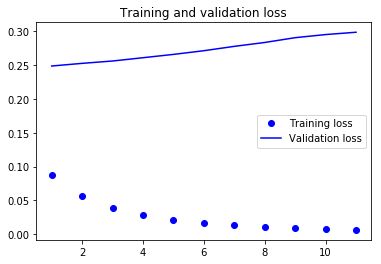

In [ ]:
plot_history(history)

Now we load the best model. And then we evaluate the model using the test data.

In [ ]:
model = keras.models.load_model('LSTM_Conv1D_retrain.h5')

In [ ]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [ ]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 70s 3ms/sample - loss: 0.2847 - acc: 0.9007


[0.28471356790333985, 0.90072]

We did beat the 90% of accuracy. Pay attention to the tecniques we used to achieve this goal. To save time, I only showed one model above. In fact, I tried many different models and optimizers. A few of these combinations should be able to beat 90% of accuracy. The above is the one I think that is most promising. The model is also realtively simple.